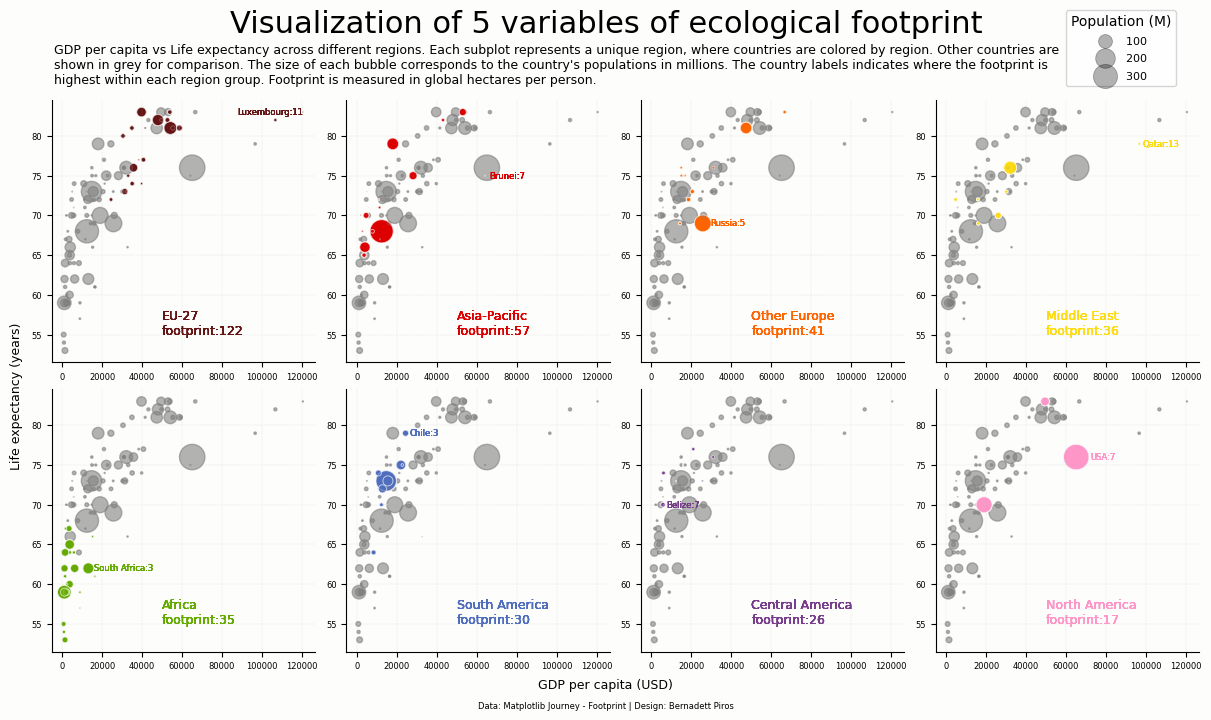

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
from pypalettes import load_cmap

url = "https://raw.githubusercontent.com/holtzy/the-python-graph-gallery/master/static/data/footprint.csv"
df = pd.read_csv(url)

df = df.dropna()
df["region"] = df["region"].replace({"Central America/Caribbean": "Central America", "Middle East/Central Asia": "Middle East"})

footprint_by_region = (df.groupby(["region"])
                       .agg(sum_footprint=("footprint", "sum"))
                       .reset_index()   
                       .sort_values(by=["sum_footprint"], ascending=False, ignore_index=True))

idx_max_footprint = df.groupby("region")["footprint"].idxmax()
text_labels = df.loc[idx_max_footprint, ["region", "country", "footprint", "gdpCapita", "lifexp"]].reset_index(drop=True)
regions_list = footprint_by_region["region"].unique().tolist()
text_labels["region"] = pd.Categorical(text_labels["region"], categories=regions_list, ordered=True)
text_labels = text_labels.sort_values("region").reset_index(drop=True)
text_labels["country"] = text_labels["country"].replace({"Brunei Darussalam": "Brunei", "Russian Federation":"Russia", "United States of America":"USA"})

colors = load_cmap("smarties").colors[::-1]

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12,6), layout="constrained")

regions = footprint_by_region["region"].unique()
footprints = footprint_by_region["sum_footprint"].unique().astype(int)
countries = text_labels["country"].unique()

for i, (region, ax, footprint, country) in enumerate(zip(regions, axs.flat, footprints, countries)):   
   region_df = df[df["region"] == region]
   other_df = df[df["region"] != region]
   for other_region in other_df["region"].unique():
      x_other = other_df.loc[other_df["region"] == other_region, "gdpCapita"]
      y_other = other_df.loc[other_df["region"] == other_region, "lifexp"]
      s = other_df.loc[other_df["region"] == other_region, "populationMillions"]
      scatter = ax.scatter(x_other, y_other, s=s, color="grey", alpha=0.6)
       
      x = region_df.loc[region_df["region"] == region, "gdpCapita"]
      y = region_df.loc[region_df["region"] == region, "lifexp"]   
      s = region_df.loc[region_df["region"] == region, "populationMillions"]
      c = colors[i]
      scatter = ax.scatter(x, y, s=s, color = c, alpha=0.6, ec="white", lw=0.6)
           
      ax.text(50000, 55, s=f"{region}\nfootprint:{footprint}", color=c, fontsize=9, ha="left")

      labels_subset = text_labels[text_labels["country"] == country]  
      x_c = labels_subset["gdpCapita"].iloc[0]  
      y_c = labels_subset["lifexp"].iloc[0]  
      f_c = labels_subset["footprint"].iloc[0].astype(int)
      offset = [0, 2000, 3500, 1500, 3000, 2000, 1000, 7000]
      ha_alignment = "right" if i == 0 else "left"
      ax.text(x_c+offset[i], y_c, s=f"{country}:{f_c}", color=colors[i], fontsize=6, ha=ha_alignment, va="center")
                                 
      ax.grid(axis="both", which="both", ls="dotted", lw=0.2, zorder=-1)

      ax.tick_params(labelsize=6)
      ax.spines[["top", "right"]].set_visible(False)     

      ax.set_facecolor("#fdfdfc")

handles, labels = scatter.legend_elements(
          prop="sizes", 
          alpha=0.3,
          num=3
          )

fig.legend(handles, labels, title="Population (M)", loc=(0.88, 0.88), fontsize=8, framealpha=0)

fig.supxlabel("GDP per capita (USD)", fontsize=9)
fig.supylabel("Life expectancy (years)", fontsize=9)

fig.set_facecolor("#fdfdfc")

txt = '''
      GDP per capita vs Life expectancy across different regions. Each subplot represents a unique region, where countries are colored by region. Other countries are
      shown in grey for comparison. The size of each bubble corresponds to the country's populations in millions. The country labels indicates where the footprint is 
      highest within each region group. Footprint is measured in global hectares per person.'''

fig.text(0.5, 1.12, "Visualization of 5 variables of ecological footprint", size=22, va="center", ha="center")

fig.text(0.02, 1.065, s=txt, size=9, va="center")

fig.text(0.5, -0.02, "Data: Matplotlib Journey - Footprint | Design: Bernadett Piros",
         size=6, ha="center")
            
plt.show()

#plt.savefig("bubble_small_multiples_footprint", dpi=300, bbox_inches='tight', pad_inches=0.2)